# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1

An important part of Monte Carlo methods regards the computation of integrals that cannot be solved analytically. The idea is to estimate the value of a finite integral in the following way:

$$I =  \int_{a}^{b} f(x) \,dx = \int_{a}^{b} g(x)p(x) \,dx \approx \frac{1}{M} \sum_{i=1}^{M} g(x_i),$$

where $a < b$ and $a, b \in \mathbb{R}$. $f$ is the function that we seek to integrate over the given interval. First of all, we write $f(x) = g(x)p(x)$, where $g$ and $p$ are two suitable functions satisfying $\int_{a}^{b} p(x) \,dx = 1$. This allows us to interpret $p$ as a probability density function. If we are able to sample $x_i \in [a, b)$ $M$ times from $p$, we can approximate the integral using the sum above. 

How should we choose $p$ and $g$? We can obiously always write: 

$$g(x)p(x) = \frac{g(x)p(x)}{d(x)} d(x)$$

with $\int_{a}^{b} p(x) \,dx = 1$. It turns out that we should use a function $d$ that has a functional form (apart from its normalization) as similar as possible to $g(x)p(x)$ in order to decrease the uncertainty on the calculation(in fact: $d(x) = g(x)p(x) / I$ would lead to a variance of zero but we donnot know $I$ yet). This approach is called **importance sampling**.

Let us now focus on a particular example that we can also solve analytically:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1.$$

Initially, we have $g(x) = \frac{\pi}{2}\cos(\pi x/2)$ and $p(x) = 1$, where $p$ is obviously normalized to $1$. Here, we just have to sample a uniform distribution. To apply importance sampling, we can reformulate the integrand in the following way:

$$\frac{\pi}{2}\cos(\pi x/2) = \frac{\frac{\pi}{2}\cos(\pi x/2)}{2(1-x)} \times 2(1-x),$$

such that we identifiy $d(x) = 2(1-x)$ with $\int_{0}^{1} d(x) \,dx = 2 - 1 = 1$. $d(x)$ is close to $g(x)p(x)$ as we can see in the figure below. Note, that, since $I = 1$, we ideally have $d(x) = g(x)p(x)$.

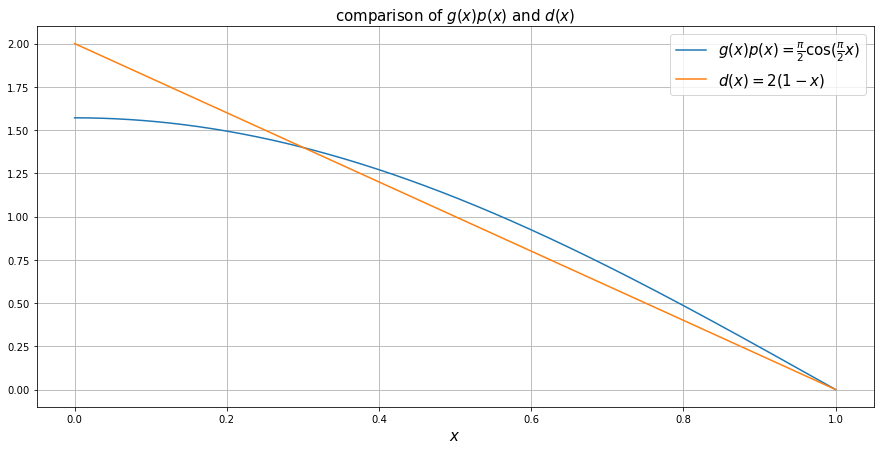

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
x = np.linspace(0, 1, 1000)
y = np.pi / 2 * np.cos(np.pi * x / 2)
y_approx =  (1 - x) * 2
plt.plot(x, y, label=r"$g(x)p(x) = \frac{\pi}{2} \cos(\frac{\pi}{2} x)$")
plt.plot(x, y_approx, label=r"$d(x) = 2(1-x)$")
plt.title("comparison of $g(x)p(x)$ and $d(x)$", size=15)
plt.xlabel("$x$", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

Now, we are able to compute the progressive mean $\langle I \rangle$ of the estimated value of the integral as a function of the number of throws $M$ for both approaches. In total, we use a number of $M_{max}=10^5$ throws. As usual, we estimate the uncertainty using the blocking method with $N_{max} = 100$ blocks. 

Both the uniform sampling and the importance sampling converge to the exact value of $1$ of the integral. However, the uncertainty on the importance sampling computation is much smaller than that of the uniform sampling.

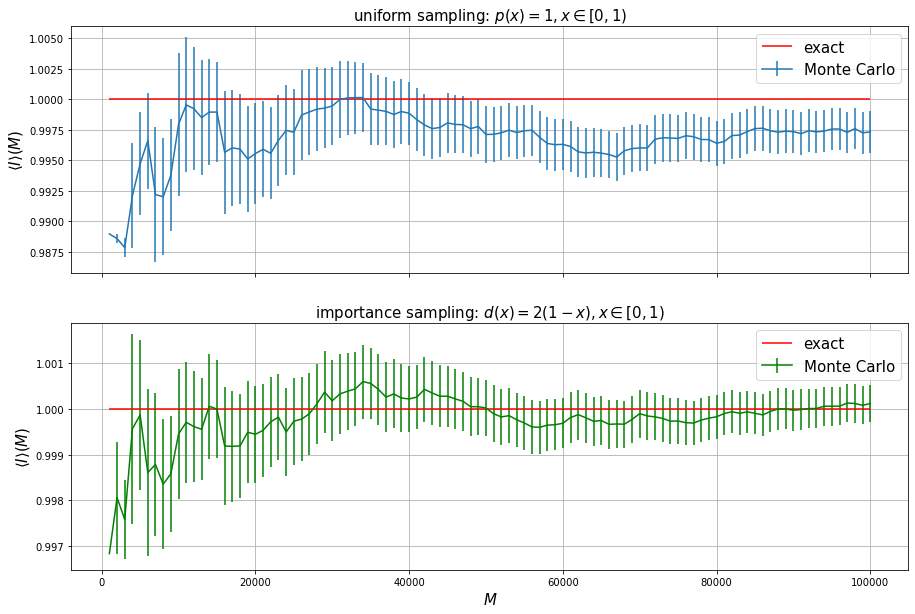

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot calculation using uniform sampling
M_uni, I_uni, error_uni = np.loadtxt("data/I_uniform_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
ax[0].errorbar(M_uni, I_uni, error_uni, label='Monte Carlo')
ax[0].hlines(1, min(M_uni), max(M_uni), color='r', label='exact')
ax[0].set_ylabel(r"$\langle I \rangle(M)$", size=15)
ax[0].set_title(r"uniform sampling: $p(x) = 1, x \in [0, 1)$", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

# plot calculation using importance sampling
M_imp, I_imp, error_imp = np.loadtxt("data/I_importance_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
ax[1].errorbar(M_imp, I_imp, error_imp, color='green', label='Monte Carlo')
ax[1].hlines(1, min(M_imp), max(M_imp), color='r', label='exact')
ax[1].set_xlabel(r"$M$", size=15)
ax[1].set_ylabel(r"$\langle I \rangle(M)$", size=15)
ax[1].set_title(r"importance sampling: $d(x) = 2 (1-x), x \in [0, 1)$", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.show()

In order to demonstrate the difference in the uncertainties, we visualize their dependency on $M$ in the following graph.

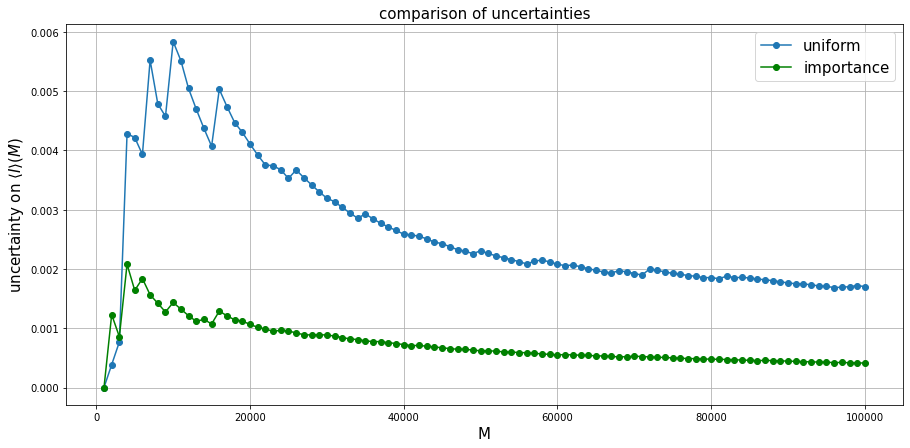

In [32]:
plt.figure(figsize=(15, 7))
plt.plot(M_uni, error_uni, label='uniform', marker='o')
plt.plot(M_imp, error_imp, color='green', label='importance', marker='o')
plt.xlabel("M", size=15)
plt.ylabel(r"uncertainty on $\langle I \rangle(M)$", size=15)
plt.title("comparison of uncertainties", size=15)
plt.grid()
plt.legend(fontsize=15)
plt.show()

### Exercise 02.2

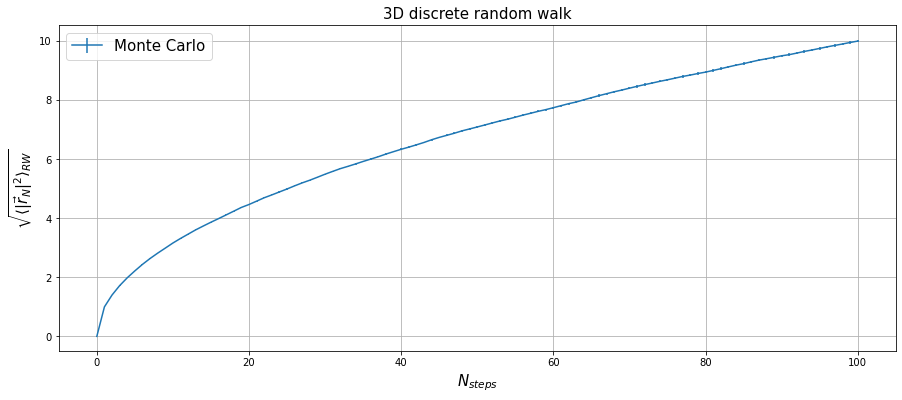

In [29]:
plt.figure(figsize=(15,6))
N_steps, r_mean, r_error = np.loadtxt("data/discrete_walk.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N_steps, r_mean, r_error, label='Monte Carlo')
plt.xlabel(r"$N_{steps}$", size=15)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$", size=15)
plt.title("3D discrete random walk", size=15)
plt.grid()
plt.legend(fontsize=15)

plt.show()

No handles with labels found to put in legend.


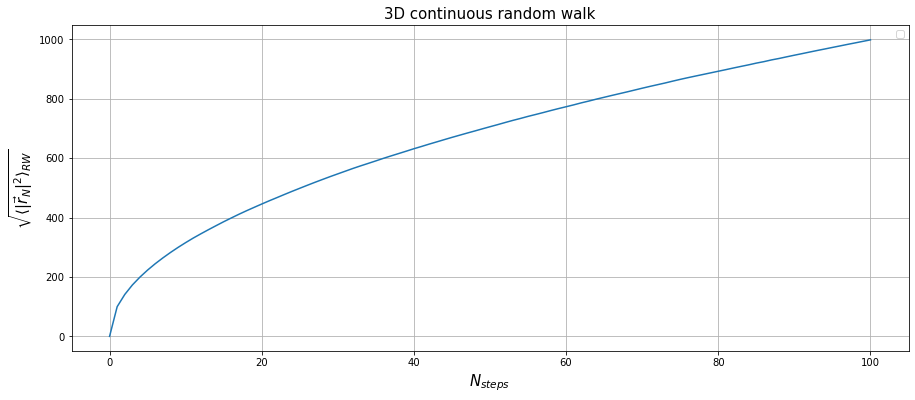

In [24]:
plt.figure(figsize=(15,6))
N_steps, r_mean, r_error = np.loadtxt("data/continuous_walk.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N_steps, r_mean, r_error)
plt.xlabel(r"$N_{steps}$", size=15)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$", size=15)
plt.title("3D continuous random walk", size=15)
plt.grid()
plt.legend()

plt.show()